In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import seaborn as sns

In [2]:
# fungsi membantu
def isNaN(value) :
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

<h2>Penjelasan Atribut</h2>

<table>
  <tr>
    <th>Num</th>
    <th>Attribute Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td>title</td>
    <td>Title</td>
  </tr>
  <tr>
    <td>2</td>
    <td>artist</td>
    <td>Artist</td>
  </tr>
  <tr>
    <td>3</td>
    <td>genre</td>
    <td>Genre of the song</td>
  </tr>
  <tr>
    <td>4</td>
    <td>year</td>
    <td>Year of the song (due to re-releases, the year might not correspond to the release year of the original song)</td>
  </tr>
  <tr>
    <td>5</td>
    <td>bpm</td>
    <td>Beats per minute</td>
  </tr>
  <tr>
    <td>6</td>
    <td>nrgy</td>
    <td>Energy of a song, the higher the value the more energetic the song is</td>
  </tr>
  <tr>
    <td>7</td>
    <td>dnce</td>
    <td>The higher the value, the easier it is to dance to this song.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>dB</td>
    <td>The higher the value, the louder the song</td>
  </tr>
  <tr>
    <td>9</td>
    <td>live</td>
    <td>The higher the value, the more likely the song is a live recording.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>val</td>
    <td>The higher the value, the more positive the mood for the song.</td></tr>
  <tr>
    <td>11</td>
    <td>dur</td>
    <td>The duration of the song</td>
  </tr>
  <tr>
    <td>12</td>
    <td>acous</td>
    <td>The higher the value the more acoustic the song is.</td>
  </tr>
  <tr>
    <td>13</td>
    <td>spch</td>
    <td>The higher the value the more spoken words the song contains.</td>
  </tr>
  <tr>
    <td>14</td>
    <td>popularity</td>
    <td>The higher the value the more popular the song is.</td>
  </tr>
  <tr>
    <td>15</td>
    <td>has_win_award</td>
    <td>Boolean value to indicate if the song has won an award or not. Value of 1 if the song has already won one or more awards otherwise 0 if the song hasn’t won any awards.</td>
  </tr>
</table>

load semua csv

In [3]:
df_1950 = pd.read_csv("1950.csv")
df_1960 = pd.read_csv("1960.csv")
df_1970 = pd.read_csv("1970.csv")
df_1980 = pd.read_csv("1980.csv")
df_1990 = pd.read_csv("1990.csv")
df_2000 = pd.read_csv("2000.csv")
df_2010 = pd.read_csv("2010.csv")
df_top10 = pd.read_csv("top10s.csv")

In [4]:
# Penggabungan seluruh data frame
df_all = pd.concat(\
    [df_1950,df_1960\
        ,df_1970,df_1980\
        ,df_1990,df_2000\
        ,df_2010,df_top10],ignore_index=True, sort=False)

df_all.to_csv('all_sort_from_1950_to_top10.csv',index=False)

# drop duplicate
df_all = df_all.drop_duplicates()
# drop all nan
df_all_clear = df_all.dropna()
# ubah data has_win_award dari float ke boolean
df_all = df_all.astype({"has_win_award":bool})
df_all_clear = df_all_clear.astype({"has_win_award":bool})

df_all.to_csv('all_no_duplicates.csv',index=False)

Preprocessing

In [5]:
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          602 non-null    object 
 1   artist         602 non-null    object 
 2   genre          602 non-null    object 
 3   year           602 non-null    int64  
 4   bpm            602 non-null    int64  
 5   nrgy           602 non-null    int64  
 6   dnce           602 non-null    int64  
 7   dB             602 non-null    int64  
 8   live           602 non-null    int64  
 9   val            602 non-null    int64  
 10  dur            602 non-null    int64  
 11  acous          602 non-null    int64  
 12  spch           602 non-null    int64  
 13  popularity     602 non-null    int64  
 14  has_win_award  602 non-null    float64
dtypes: float64(1), int64(11), object(3)
memory usage: 70.7+ KB


In [6]:
# ubah data has_win_award dari float ke boolean
df_1950 = df_1950.astype({"has_win_award":bool})
df_1960 = df_1960.astype({"has_win_award":bool})
df_1970 = df_1970.astype({"has_win_award":bool})
df_1980 = df_1980.astype({"has_win_award":bool})
df_1990 = df_1990.astype({"has_win_award":bool})
df_2000 = df_2000.astype({"has_win_award":bool})
df_2010 = df_2010.astype({"has_win_award":bool})
df_top10 = df_top10.astype({"has_win_award":bool})

In [7]:
# cek duplikasi
print(sum(df_1950.duplicated()))
print(sum(df_1960.duplicated()))
print(sum(df_1970.duplicated()))
print(sum(df_1980.duplicated()))
print(sum(df_1990.duplicated()))
print(sum(df_2000.duplicated()))
print(sum(df_2010.duplicated()))
print(sum(df_top10.duplicated()))

0
0
0
0
0
0
0
0


In [8]:
# cek null di kolom yang mana
def cek_apakah_ada_null(data_frame):
    cek = data_frame.isnull()
    columns = list(cek.columns)
    c_null = []
    for i in columns:
        if sum(cek[i]) != 0:
            c_null.append(i)
    return c_null

In [9]:
print(cek_apakah_ada_null(df_1950))
print(cek_apakah_ada_null(df_1960))
print(cek_apakah_ada_null(df_1970))
print(cek_apakah_ada_null(df_1980))
print(cek_apakah_ada_null(df_1990))
print(cek_apakah_ada_null(df_2000))
print(cek_apakah_ada_null(df_2010))
print(cek_apakah_ada_null(df_top10))

['genre']
[]
[]
['genre']
['genre']
[]
[]
[]


<AxesSubplot:>

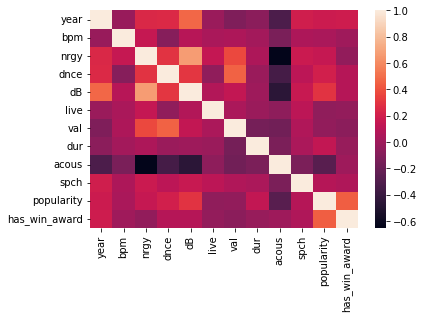

In [10]:
sns.heatmap(df_all.corr())

<AxesSubplot:>

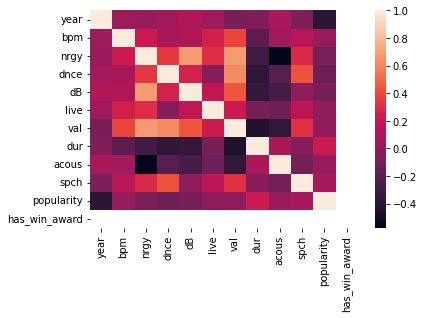

In [11]:
sns.heatmap(df_1950.corr())

<AxesSubplot:>

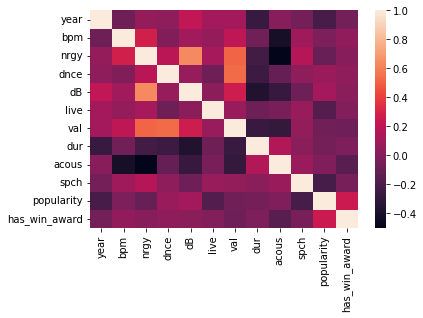

In [12]:
sns.heatmap(df_1960.corr())

<AxesSubplot:>

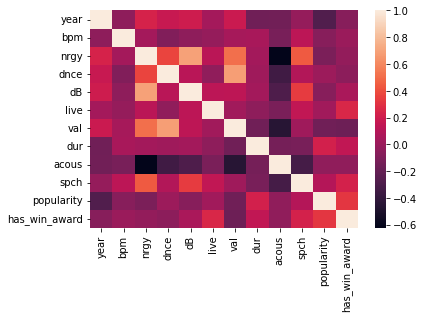

In [13]:
sns.heatmap(df_1970.corr())

<AxesSubplot:>

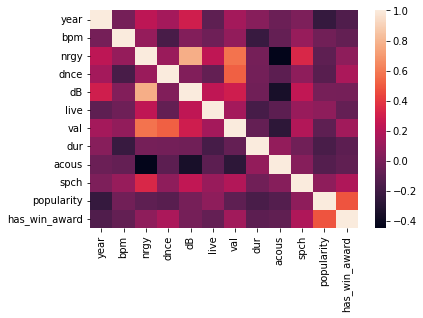

In [14]:
sns.heatmap(df_1980.corr())

<AxesSubplot:>

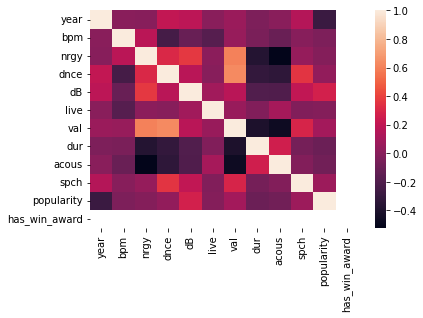

In [15]:
sns.heatmap(df_1990.corr())

<AxesSubplot:>

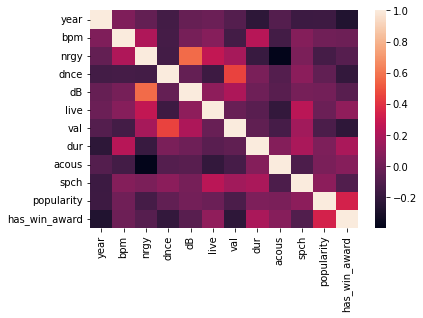

In [16]:
sns.heatmap(df_2000.corr())

<AxesSubplot:>

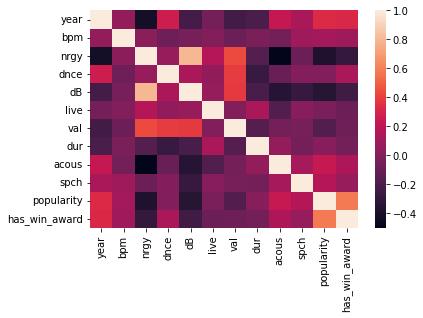

In [17]:
sns.heatmap(df_2010.corr())

<AxesSubplot:>

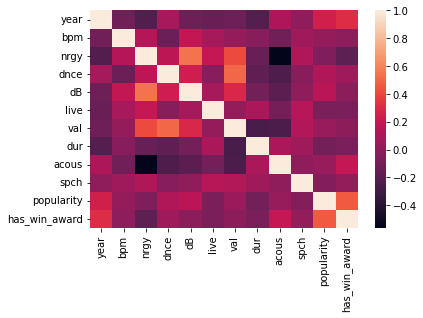

In [18]:
sns.heatmap(df_top10.corr())

Hanya energy, dB, dan acoustic saja yang dapat mendeskripsikan sebuah lagu


In [19]:
attribute_spotify_high_corr = ["nrgy","dB","acous"]

In [20]:
# buat scaler
def scaler_spotify(df, attribute_spotify):
    sc = MinMaxScaler()
    data_scaled = sc.fit_transform(df.loc[:,attribute_spotify])
    return data_scaled

def scaler_spotify_with_PCA(df, attribute_spotify):
    sc = MinMaxScaler()
    data_scaled = sc.fit_transform(df.loc[:,attribute_spotify])
    pca = PCA(n_components=0.95)
    pca.fit(data_scaled)
    data_scaled = pca.transform(data_scaled)
    return data_scaled

Clustering

In [21]:
# menggunakan clustering kmeans
# mencari nilai optimal dari k
def optimal_kmeans(scaled_data):
    sil = []
    k = range(2,25)
    for i in k:
        cluster_data = KMeans(n_clusters=i)\
            .fit(scaled_data)
        sil.append(silhouette_score(scaled_data\
            ,cluster_data.labels_,metric='euclidean'))
    plt.plot(k,sil, "bx-")
    plt.xlabel("K")
    plt.ylabel("sil")
    plt.show()
    return sil.index(max(sil))+2

In [22]:
attribute_spotify = ["bpm","nrgy","dnce","dB","live","val","dur","acous","spch","popularity","has_win_award"]

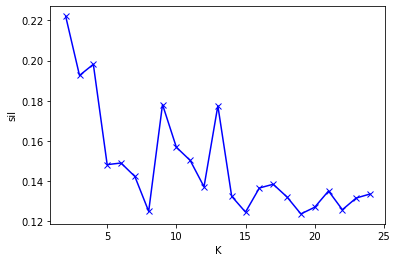

2


In [23]:
df_1950_std = scaler_spotify(df_1950, attribute_spotify)
k = optimal_kmeans(df_1950_std)
df_1950_cd = KMeans(n_clusters=k)\
    .fit_predict(df_1950_std)
df_1950_cluster = df_1950.copy()
df_1950_cluster['cluster'] = df_1950_cd
print(k)

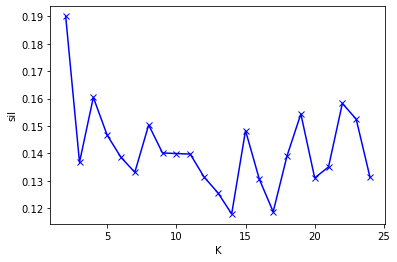

2


In [24]:
df_1960_std = scaler_spotify(df_1960, attribute_spotify)
k = optimal_kmeans(df_1960_std)
df_1960_cd = KMeans(n_clusters=k).fit_predict(df_1960_std)
df_1960_cluster = df_1960.copy()
df_1960_cluster['cluster'] = df_1960_cd
print(k)

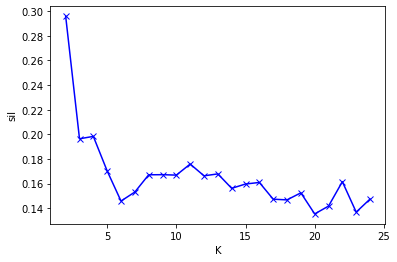

2


In [25]:
df_1970_std = scaler_spotify(df_1970, attribute_spotify)
k = optimal_kmeans(df_1970_std)
df_1970_cd = KMeans(n_clusters=k).fit_predict(df_1970_std)
df_1970_cluster = df_1970.copy()
df_1970_cluster['cluster'] = df_1970_cd
print(k)

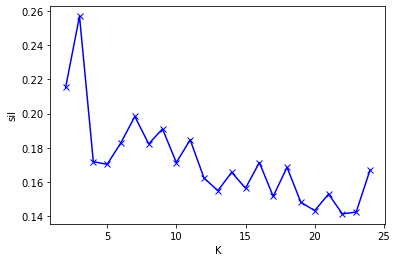

3


In [26]:
df_1980_std = scaler_spotify(df_1980, attribute_spotify)
k = optimal_kmeans(df_1980_std)
df_1980_cd = KMeans(n_clusters=k).fit_predict(df_1980_std)
df_1980_cluster = df_1980.copy()
df_1980_cluster['cluster'] = df_1980_cd
print(k)

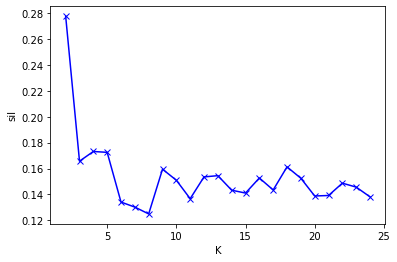

2


In [27]:
df_1990_std = scaler_spotify(df_1990, attribute_spotify)
k = optimal_kmeans(df_1990_std)
df_1990_cd = KMeans(n_clusters=k).fit_predict(df_1990_std)
df_1990_cluster = df_1990.copy()
df_1990_cluster['cluster'] = df_1990_cd
print(k)

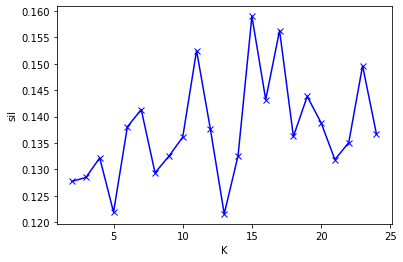

15


In [28]:
df_2000_std = scaler_spotify(df_2000, attribute_spotify)
k = optimal_kmeans(df_2000_std)
df_2000_cd = KMeans(n_clusters=k).fit_predict(df_2000_std)
df_2000_cluster = df_2000.copy()
df_2000_cluster['cluster'] = df_2000_cd
print(k)

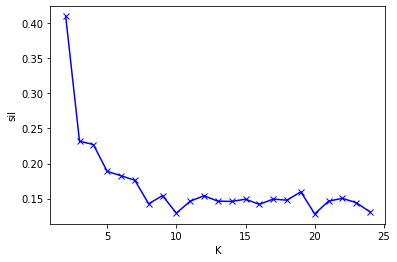

2


In [29]:
df_2010_std = scaler_spotify(df_2010, attribute_spotify)
k = optimal_kmeans(df_2010_std)
df_2010_cd = KMeans(n_clusters=k).fit_predict(df_2010_std)
df_2010_cluster = df_2010.copy()
df_2010_cluster['cluster'] = df_2010_cd
print(k)

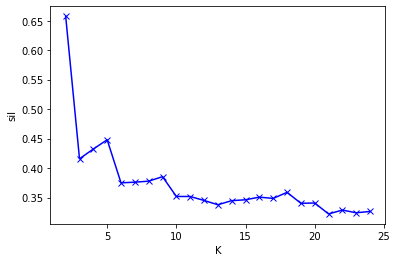

2


In [30]:
df_top10_std = scaler_spotify(df=df_top10\
    ,attribute_spotify=attribute_spotify_high_corr)
k = optimal_kmeans(df_top10_std)
df_top10_cd = KMeans(n_clusters=k).fit_predict(df_top10_std)
df_top10_cluster = df_top10.copy()
df_top10_cluster['cluster'] = df_top10_cd
print(k)

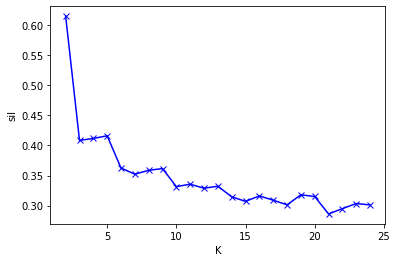

2


In [58]:
df_all_std = scaler_spotify(df_all, attribute_spotify_high_corr)
k = optimal_kmeans(df_all_std)
df_all_cd = KMeans(n_clusters=k).fit_predict(df_all_std)
df_all_cluster = df_all.copy()
df_all_cluster['cluster'] = df_all_cd
print(k)

In [59]:
from sklearn.metrics import silhouette_score
silhouette_score(df_all.loc[:,attribute_spotify_high_corr], df_all_cd, metric='euclidean')

0.6203765854379533

Analisa

Artis yang populer

In [32]:
sum(df_top10.duplicated())

0

In [33]:
artist_total = pd.unique(df_all.loc[:,'artist'])
print("Total Artist : %d" % (len(artist_total)))

Total Artist : 589


In [34]:
genre_total = pd.unique(df_all.loc[:,'genre'])
print("Total Genre : %d" % (len(genre_total)))

Total Genre : 137


In [35]:
df_all['artist'].value_counts()

Rihanna              21
Katy Perry           20
Justin Bieber        18
Maroon 5             16
Bruno Mars           15
                     ..
Van Halen             1
Eric Carmen           1
Michael Sembello      1
Bruce Springsteen     1
R3HAB                 1
Name: artist, Length: 589, dtype: int64

Artis yang paling populer dapat dihitung dari jumlah nilai lagu yang populer

In [36]:
def dict_artist_popularity(df):
    artist_popularity = dict()
    for i in df.index:
        artist = df['artist'][i]
        popularity = df['popularity'][i]
        artist_popularity[artist] = artist_popularity.setdefault(artist,0)\
            + popularity
    return artist_popularity

In [37]:
artis_populer = dict_artist_popularity(df_top10.loc[df_top10['year'] == 2010])
max(artis_populer, key=artis_populer.get)

'Kesha'

Mencari genre lagu yang populer dapat menggunakan hal yang sama saat mencari artis yang paling populer

In [38]:
def dict_genre_popularity(df):
    genre_popularity = dict()
    for i in df.index:
        genre = df['genre'][i]
        popularity = df['popularity'][i]
        genre_popularity[genre] = genre_popularity.setdefault(genre,0)\
            + popularity
    return genre_popularity

In [39]:
genre_populer = dict_genre_popularity(df_top10[df_top10['year'] == 2010])
max(genre_populer, key=genre_populer.get)

'dance pop'

Untuk melakukan list genre musik dari artis dapat dilakukan dengan melakukan list setiap artis

In [40]:
def dict_artist_genre(df):
    artist_genre = dict()
    for i in df.index:
        artist = df['artist'][i]
        genre = df['genre'][i]
        if isNaN(genre):
            artist_genre.setdefault(artist,set())
            continue
        artist_genre.setdefault(artist,set()).add(genre)
    return artist_genre

In [41]:
def dict_artist_music(df):
    artist_music = dict()
    for i in df.index:
        artist = df['artist'][i]
        music = df['title'][i]
        if isNaN(music):
            artist_music.setdefault(artist,set())
            continue
        artist_music.setdefault(artist,set()).add(music)
    return artist_music

In [42]:
def dict_genre_music(df):
    genre_music = dict()
    for i in df.index:
        genre = df['genre'][i]
        music = df['title'][i]
        if isNaN(music):
            genre_music.setdefault(genre,set())
            continue
        genre_music.setdefault(genre,set()).add(music)
    return genre_music

In [43]:
artist_genre = dict_artist_genre(df_all)

for i in artist_genre.keys():
    artist_genre[i] = len(artist_genre[i])

genre_max = max(artist_genre.values())
genre_max

2

In [44]:
music = dict_artist_music(df_all)
df_all.loc[df_all['artist'] == 'Taylor Swift']

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
494,I Knew You Were Trouble.,Taylor Swift,dance pop,2012,77,47,62,-7,3,68,220,0,4,75,False
508,We Are Never Ever Getting Back Together,Taylor Swift,dance pop,2012,86,68,63,-6,12,75,193,1,9,73,False
509,Love Story,Taylor Swift,dance pop,2008,119,74,62,-4,8,31,236,13,3,73,False
552,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,dance pop,2006,100,42,62,-7,12,29,203,29,2,61,False
645,Wildest Dreams,Taylor Swift,dance pop,2014,140,66,55,-7,11,47,220,7,7,71,False
776,I Knew You Were Trouble.,Taylor Swift,pop,2012,77,47,62,-7,3,68,220,0,4,77,False
780,We Are Never Ever Getting Back Together,Taylor Swift,pop,2012,86,68,63,-6,12,75,193,1,9,75,False
819,We Are Never Ever Getting Back Together,Taylor Swift,pop,2013,86,68,63,-6,12,75,193,1,9,75,False
882,Shake It Off,Taylor Swift,pop,2014,160,80,65,-5,33,94,219,6,17,78,False
1074,Out Of The Woods,Taylor Swift,pop,2016,92,84,55,-7,34,34,236,0,4,66,False


Pengaruh durasi waktu dengan popularitas lagu

In [45]:
attribute_spotify_durration_popularity = ["dur","popularity"]

In [46]:
df_durr_popularity = df_all.loc[:,attribute_spotify_durration_popularity]
df_durr_popularity.corr()

,dur,popularity
dur,1.00000,0.13945
popularity,0.13945,1.00000


Klasifikasi Genre Lagu

In [47]:
df_all_clear.head()

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,False
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,False
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,False
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,False
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,False


In [48]:
X = df_all_clear.loc[:,attribute_spotify_high_corr]
y = df_all_clear['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_train = scaler_spotify(X_train, attribute_spotify_high_corr)
X_test = scaler_spotify(X_test, attribute_spotify_high_corr)

In [49]:
knn_genre = KNeighborsClassifier(n_neighbors=3)
knn_genre.fit(X_train, y_train)

y_pred = knn_genre.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]
                     precision    recall  f1-score   support

    adult standards       0.29      0.67      0.41        18
           afrobeat       0.00      0.00      0.00         1
            afropop       0.00      0.00      0.00         0
         album rock       0.06      0.67      0.12        12
alternative country       0.00      0.00      0.00         1
  alternative metal       0.00      0.00      0.00         2
    alternative r&b       0.00      0.00      0.00         1
   alternative rock       0.00      0.00      0.00         0
   appalachian folk       0.00      0.00      0.00         1
            art pop       0.00      0.00      0.00         2
           art rock       0.00      0.00      0.00         0
        atl hip hop       0.00      0.00      0.00         3
   australian dance       0.00      0.00      0.00

/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: Undefi

Prediksi popularitas
<br>
Jika dilihat dari nilai korelasi yang dimiliki, maka fitur dnce, dB, dan acous miliki nilai yang tinggi

In [50]:
attribute_spotify_popularity = ['dnce','dB','acous']
X = np.array(df_all.loc[:,attribute_spotify_popularity])
y = np.array(df_all.loc[:,'popularity'])

lr_popularity = LinearRegression().fit(X,y)

In [51]:
lr_popularity.score(X,y)

0.11735633001472667

In [52]:
lr_popularity.coef_

array([ 0.08645302,  0.78733199, -0.08162317])

In [53]:
lr_popularity.intercept_

66.81671290264777

In [54]:
label_0 = df_1980_cluster.loc[df_1980_cluster['cluster'] == 0]
label_1 = df_1980_cluster.loc[df_1980_cluster['cluster'] == 1]
label_2 = df_1980_cluster.loc[df_1980_cluster['cluster'] == 2]

<function matplotlib.pyplot.show(close=None, block=None)>

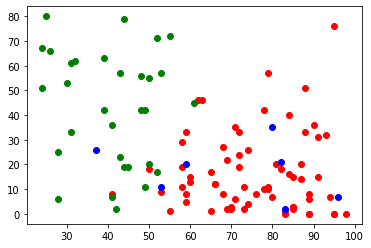

In [55]:
plt.scatter(label_0['nrgy'], label_0['acous'], color='red')
plt.scatter(label_1['nrgy'], label_1['acous'], color='blue')
plt.scatter(label_2['nrgy'], label_2['acous'], color='green')
plt.show